In [91]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

file_name = 'Folkhalsomyndigheten_Covid19.xlsx'

In [92]:
xl = pd.ExcelFile(file_name)
#xl.sheet_names
cases = xl.parse('Antal per dag region')

In [93]:
cases.head()

,Statistikdatum,Totalt_antal_fall,Blekinge,Dalarna,Gotland,Gävleborg,Halland,Jämtland_Härjedalen,Jönköping,Kalmar,...,Stockholm,Sörmland,Uppsala,Värmland,Västerbotten,Västernorrland,Västmanland,Västra_Götaland,Örebro,Östergötland
0,2020-02-04,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-02-05,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-02-06,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-02-07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-02-08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
cases = cases[(cases['Statistikdatum'] > '2020-03-13')]

In [95]:
cases['Statistikdatum'] = cases['Statistikdatum'].dt.date

In [96]:
cases = cases.set_index('Statistikdatum')

In [97]:
del cases['Totalt_antal_fall']

In [98]:
cases.head()

,Blekinge,Dalarna,Gotland,Gävleborg,Halland,Jämtland_Härjedalen,Jönköping,Kalmar,Kronoberg,Norrbotten,...,Stockholm,Sörmland,Uppsala,Värmland,Västerbotten,Västernorrland,Västmanland,Västra_Götaland,Örebro,Östergötland
Statistikdatum,,,,,,,,,,,,,,,,,,,,,
2020-03-14,0,0,0,1,0,3,0,2,1,0,...,18,1,4,1,3,0,0,5,0,7
2020-03-15,1,0,0,0,2,7,4,0,1,0,...,17,4,0,1,1,0,0,18,0,9
2020-03-16,0,0,0,2,1,1,2,0,0,0,...,34,12,2,2,2,1,7,6,0,8
2020-03-17,1,3,1,4,3,0,1,0,1,1,...,35,5,5,1,3,1,6,13,16,13
2020-03-18,1,2,1,2,2,4,2,1,1,0,...,58,0,17,1,3,1,0,10,3,28


In [99]:
cases = cases.fillna(0).astype('int32')

In [100]:
del cases['Stockholm']

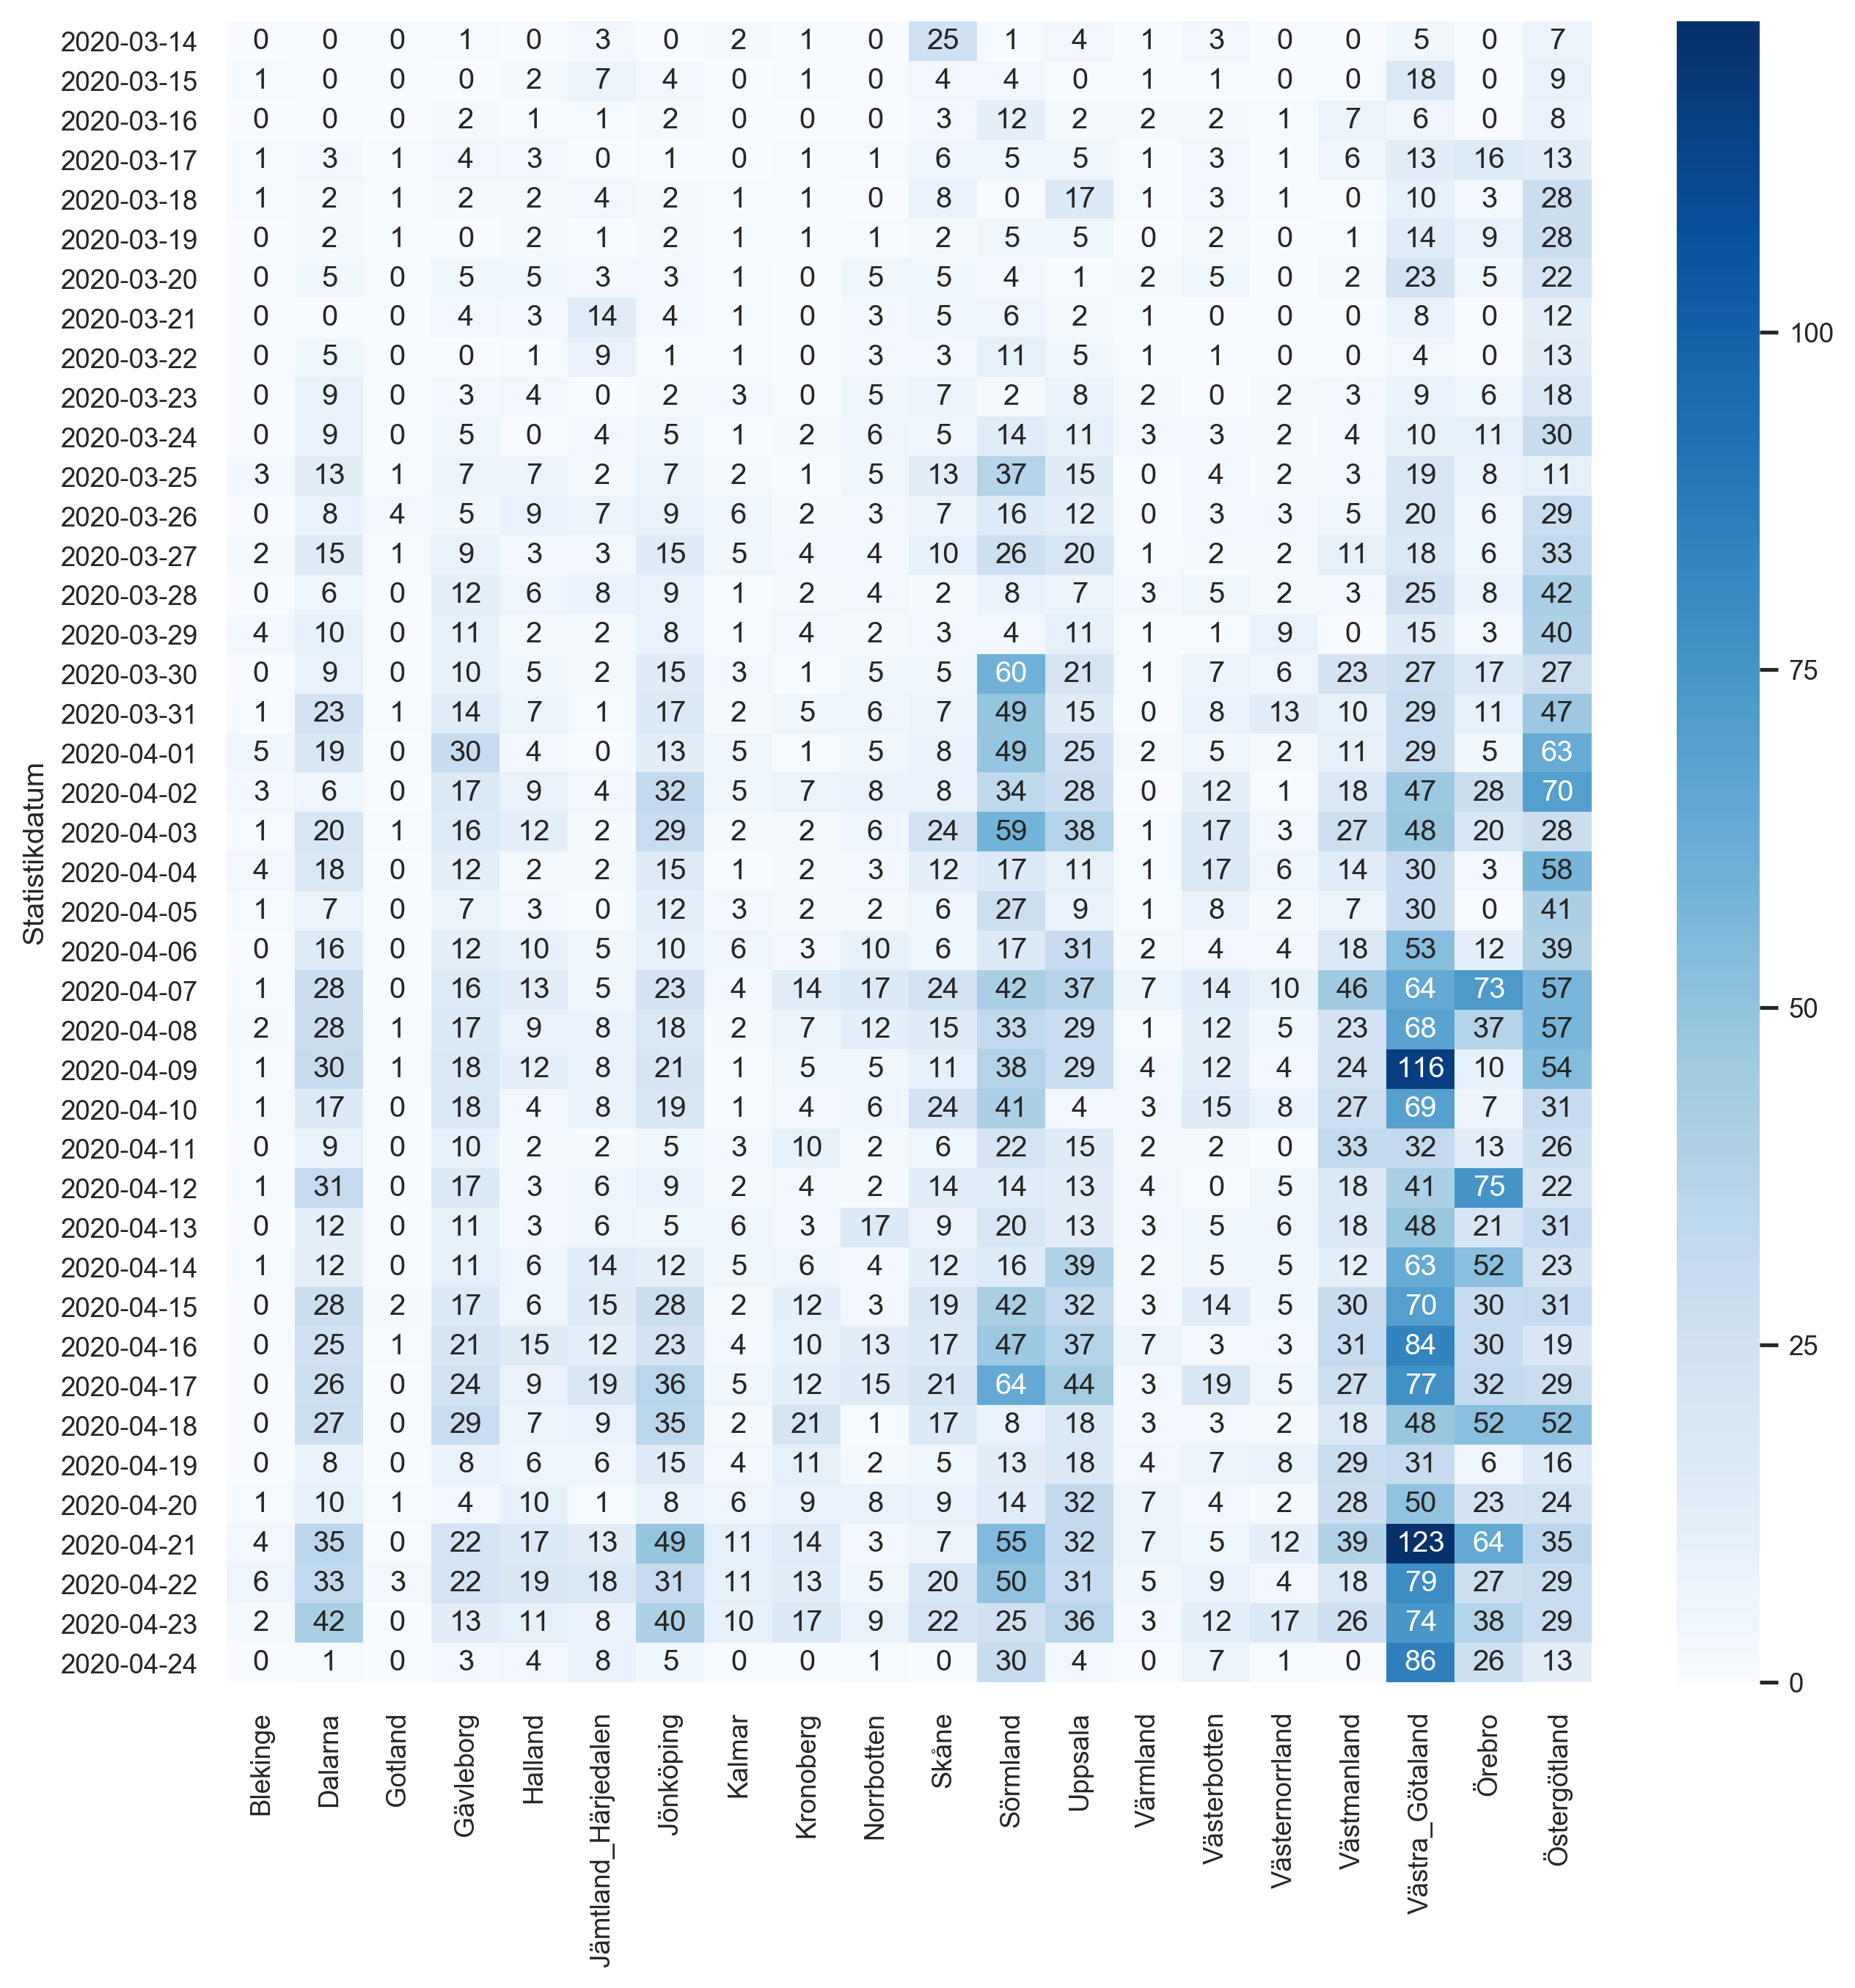

In [101]:
sns.set()
sns.set_context("notebook", font_scale=.8)

f, ax = plt.subplots(figsize=(10,10), dpi=300)

sns.heatmap(data=cases, ax=ax, annot=True, fmt='d', cmap='Blues')

plt.savefig('cases_heatmap.png', bbox_inches='tight')